In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./data/DiamondsPrices_cleaned.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53902, 10)

In [5]:
dummies = pd.get_dummies(
    data[['clarity', 'cut', 'color']], drop_first=False, dtype=int)
dummies.head(10)

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
7,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [6]:
data = pd.concat([dummies, data], axis=1)
data.head()

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,...,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0,0,1,0,0,0,0,0,0,...,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0,0,1,0,0,0,0,0,0,0,...,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0,0,0,0,1,0,0,0,0,1,...,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0,0,0,0,0,1,0,0,0,0,...,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0,0,0,1,0,0,0,0,0,1,...,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
data = data.drop(['clarity', 'cut', 'color'], axis=1)
data.head()

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,...,color_H,color_I,color_J,carat,depth,table,price,x,y,z
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0.31,63.3,58.0,335,4.34,4.35,2.75


In [9]:
X = data.drop(['price'], axis=1)
y = data['price']

In [10]:
X.head(3)

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,...,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.23,61.5,55.0,3.95,3.98,2.43
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.21,59.8,61.0,3.89,3.84,2.31
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0.23,56.9,65.0,4.05,4.07,2.31


In [11]:
y.head(3)

0    326
1    326
2    327
Name: price, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

In [15]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
score = model_lr.score(X_test, y_test)
score

0.9227151187172876

In [16]:
model_lso = Lasso()
model_lso.fit(X_train, y_train)
score = model_lso.score(X_test, y_test)
score

0.9224669883267314

In [17]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)
score = model_dtr.score(X_test, y_test)
score

0.9674206149082697

In [18]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
score = model_xgb.score(X_test, y_test)
score

0.981262821296871

In [19]:
X.columns

Index(['clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'carat', 'depth',
       'table', 'x', 'y', 'z'],
      dtype='object')

In [20]:
X.head(2)

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,...,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.23,61.5,55.0,3.95,3.98,2.43
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.21,59.8,61.0,3.89,3.84,2.31


In [21]:
import numpy as np

In [23]:
data[['table', 'carat', 'depth', 'x', 'y', 'z']].describe()

,table,carat,depth,x,y,z
count,53902.000000,53902.000000,53902.000000,53902.000000,53902.000000,53902.000000
mean,57.456714,0.797004,61.749043,5.730675,5.732516,3.538772
std,2.226458,0.471595,1.431697,1.117818,1.109742,0.690420
min,49.000000,0.200000,43.000000,3.730000,3.680000,1.070000
25%,56.000000,0.400000,61.000000,4.710000,4.720000,2.910000
50%,57.000000,0.700000,61.800000,5.700000,5.710000,3.530000
75%,59.000000,1.040000,62.500000,6.540000,6.540000,4.030000
max,79.000000,3.240000,79.000000,9.540000,9.460000,5.980000


In [24]:
# input = ['clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
#    'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'cut_Fair', 'cut_Good',
#    'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
#    'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'carat', 'depth',
#    'table', 'x', 'y', 'z']
# carat : 0.20 -> 3.24
# depth : 43 - 80
# table : 50 - 80

# x : 3.73 - 9.54
# y : 3.68 - 9.46
# z : 1.07 - 5.98
# Output: Price
def predict_price(model, clarity, cut, color, carat, depth, table, x, y, z):
    columns = ['clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
               'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'cut_Fair', 'cut_Good',
               'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
               'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'carat', 'depth',
               'table', 'x', 'y', 'z']
    x_input = np.zeros(len(columns))
    x_input = x_input.tolist()
    x_input[20] = carat
    x_input[21] = depth
    x_input[22] = table
    x_input[23] = x
    x_input[24] = y
    x_input[25] = z

    clarity_index = columns.index(clarity)
    x_input[clarity_index] = 1

    cut_index = columns.index(cut)
    x_input[cut_index] = 1

    color_index = columns.index(color)
    x_input[color_index] = 1

    x_input = np.array(x_input).reshape(1, -1)

    price = model.predict(x_input)
    return price[0]

In [49]:
testing_df = pd.read_csv('./data/DiamondsPrices_cleaned.csv')
testing_df[testing_df['price'] > 5000].head()

,carat,cut,color,clarity,depth,table,price,x,y,z
11409,1.16,Ideal,E,SI2,62.7,56.0,5001,6.69,6.73,4.21
11410,1.16,Ideal,E,SI2,59.9,57.0,5001,6.80,6.82,4.08
11411,0.90,Good,G,VVS2,63.6,58.0,5001,6.10,6.11,3.88
11412,0.90,Very Good,E,VS1,62.3,56.0,5001,6.10,6.19,3.83
11413,0.90,Premium,D,VS2,62.6,59.0,5001,6.14,6.17,3.85


In [47]:
X.columns

Index(['clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'carat', 'depth',
       'table', 'x', 'y', 'z'],
      dtype='object')

In [28]:
clarity = 'clarity_VVS1'
cut = 'cut_Ideal'
color = 'color_F'
price_lr = predict_price(model_lr, clarity, cut, color,
                         0.31, 61.8, 54.,  4.39,  4.41,  2.72)
price_lso = predict_price(model_lso, clarity, cut,
                          color, 0.31, 61.8, 54.,  4.39,  4.41,  2.72)
price_dtr = predict_price(model_dtr, clarity, cut,
                          color, 0.31, 61.8, 54.,  4.39,  4.41,  2.72)
price_xgb = predict_price(model_xgb, clarity, cut,
                          color, 0.31, 61.8, 54.,  4.39,  4.41,  2.72)

price_lr, price_lso, price_dtr, price_xgb

(1405.0, 1367.1596518373553, 926.0, 858.84174)

In [29]:
ypred_lr = model_lr.predict(X_test)
ypred_lso = model_lso.predict(X_test)
ypred_dtr = model_dtr.predict(X_test)
ypred_xgb = model_xgb.predict(X_test)

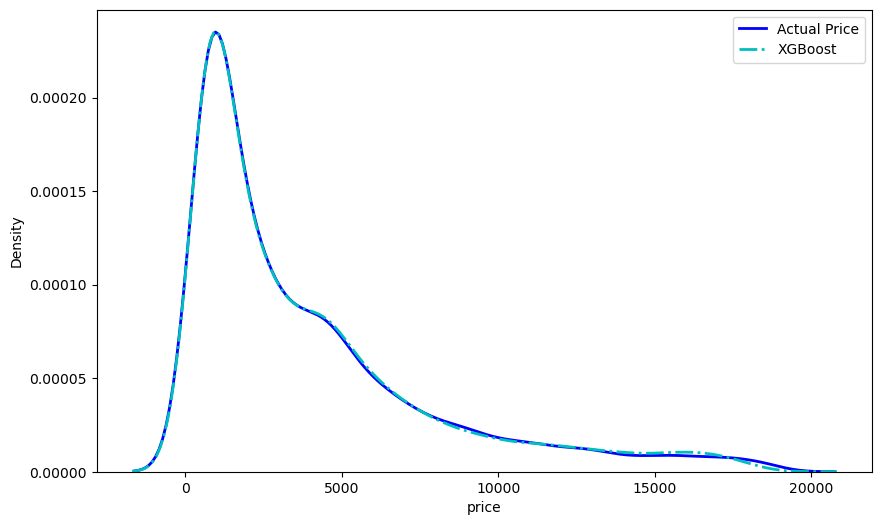

In [43]:
plt.figure(figsize=(10, 6))
ob = sns
ob.kdeplot(y_test, label='Actual Price', color='b', linewidth=2)
# ob.kdeplot(ypred_lr, label='Linear Regression', color='r', linewidth=2)
# ob.kdeplot(ypred_lso, label='Lasso', color='g', linewidth=2)
# ob.kdeplot(ypred_dtr, label='Decision Tree', color='y', linewidth=2)
ob.kdeplot(ypred_xgb, label='XGBoost', color='c', linewidth=2, linestyle='-.')
plt.legend()
plt.show()

In [44]:
import joblib

In [45]:
joblib.dump(model_xgb, './DiamondsPrices_model.pkl')

['./DiamondsPrices_model.pkl']